In [196]:
import pandas as pd

In [197]:
'''
prices_round_1_day_-1.csv
trades_round_1_day_-1.csv
'''

prices = pd.concat([pd.read_csv(f'round1/prices_round_1_day_{i}.csv', sep=';') for i in range(-2, 1)], ignore_index=True)
trades = pd.concat([pd.read_csv(f'round1/trades_round_1_day_{i}_nn.csv', sep=';') for i in range(-2, 1)], ignore_index=True)

In [198]:
ink = prices[prices['product'] == 'SQUID_INK'].copy()
ink

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
2,-2,0,SQUID_INK,1998,26,NaN,NaN,NaN,NaN,2002,26,NaN,NaN,NaN,NaN,2000.0,0.0
3,-2,100,SQUID_INK,1999,5,1998.0,26.0,NaN,NaN,2001,20,NaN,NaN,NaN,NaN,2000.0,0.0
7,-2,200,SQUID_INK,1997,31,NaN,NaN,NaN,NaN,2000,1,2001.0,30.0,NaN,NaN,1998.5,0.0
11,-2,300,SQUID_INK,1997,27,NaN,NaN,NaN,NaN,2000,27,NaN,NaN,NaN,NaN,1998.5,0.0
14,-2,400,SQUID_INK,1996,20,NaN,NaN,NaN,NaN,2000,20,NaN,NaN,NaN,NaN,1998.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89986,0,999500,SQUID_INK,1830,28,NaN,NaN,NaN,NaN,1833,28,NaN,NaN,NaN,NaN,1831.5,0.0
89989,0,999600,SQUID_INK,1832,7,1831.0,29.0,NaN,NaN,1834,2,1835.0,27.0,NaN,NaN,1833.0,0.0
89993,0,999700,SQUID_INK,1834,1,1832.0,26.0,NaN,NaN,1835,26,NaN,NaN,NaN,NaN,1834.5,0.0
89994,0,999800,SQUID_INK,1837,27,NaN,NaN,NaN,NaN,1839,1,1840.0,27.0,NaN,NaN,1838.0,0.0


In [199]:
ink_trades = trades[trades['symbol'] == 'SQUID_INK'].copy()

In [200]:
ink_trades

,timestamp,buyer,seller,symbol,currency,price,quantity
3,0,NaN,NaN,SQUID_INK,SEASHELLS,2002.0,1
5,100,NaN,NaN,SQUID_INK,SEASHELLS,2001.0,6
7,1000,NaN,NaN,SQUID_INK,SEASHELLS,1999.0,10
9,1100,NaN,NaN,SQUID_INK,SEASHELLS,1999.0,1
12,1500,NaN,NaN,SQUID_INK,SEASHELLS,2000.0,1
...,...,...,...,...,...,...,...
24875,998500,NaN,NaN,SQUID_INK,SEASHELLS,1840.0,10
24877,998700,NaN,NaN,SQUID_INK,SEASHELLS,1840.0,1
24880,998800,NaN,NaN,SQUID_INK,SEASHELLS,1831.0,1
24883,999500,NaN,NaN,SQUID_INK,SEASHELLS,1830.0,2


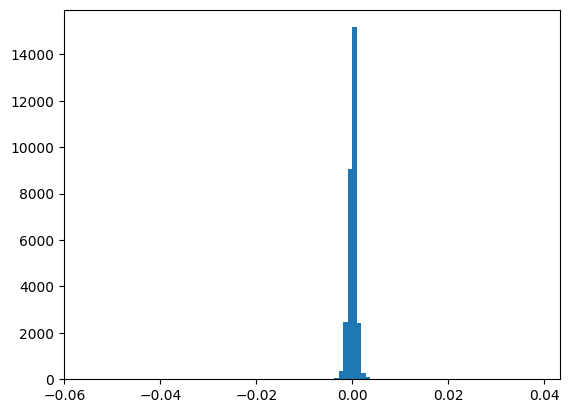

In [201]:
import matplotlib.pyplot as plt
import numpy as np

ink_returns = ink['mid_price'].pct_change()
ink_log_returns = np.log(ink['mid_price'] / ink['mid_price'].shift(1))
plt.hist(ink_log_returns.dropna(), bins=100)
plt.show()

In [202]:
ink_trades

,timestamp,buyer,seller,symbol,currency,price,quantity
3,0,NaN,NaN,SQUID_INK,SEASHELLS,2002.0,1
5,100,NaN,NaN,SQUID_INK,SEASHELLS,2001.0,6
7,1000,NaN,NaN,SQUID_INK,SEASHELLS,1999.0,10
9,1100,NaN,NaN,SQUID_INK,SEASHELLS,1999.0,1
12,1500,NaN,NaN,SQUID_INK,SEASHELLS,2000.0,1
...,...,...,...,...,...,...,...
24875,998500,NaN,NaN,SQUID_INK,SEASHELLS,1840.0,10
24877,998700,NaN,NaN,SQUID_INK,SEASHELLS,1840.0,1
24880,998800,NaN,NaN,SQUID_INK,SEASHELLS,1831.0,1
24883,999500,NaN,NaN,SQUID_INK,SEASHELLS,1830.0,2


In [203]:
# plot ink trade volume in t-1 timestamp against ink return from t to t+1

In [204]:
ink = ink.copy()

(ink[['bid_volume_1', 'bid_volume_2', 'bid_volume_3']].fillna(0)).sum(axis=1)

ink['tot_bid_volume'] = (ink[['bid_volume_1', 'bid_volume_2', 'bid_volume_3']].fillna(0)).sum(axis=1)
ink['tot_ask_volume'] = (ink[['ask_volume_1', 'ask_volume_2', 'ask_volume_3']].fillna(0)).sum(axis=1)
ink['tot_volume'] = ink['tot_bid_volume'] + ink['tot_ask_volume']

ink['vol_diff'] = ink['tot_bid_volume'] - ink['tot_ask_volume']

In [205]:
ink

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,tot_bid_volume,tot_ask_volume,tot_volume,vol_diff
2,-2,0,SQUID_INK,1998,26,NaN,NaN,NaN,NaN,2002,...,NaN,NaN,NaN,NaN,2000.0,0.0,26.0,26.0,52.0,0.0
3,-2,100,SQUID_INK,1999,5,1998.0,26.0,NaN,NaN,2001,...,NaN,NaN,NaN,NaN,2000.0,0.0,31.0,20.0,51.0,11.0
7,-2,200,SQUID_INK,1997,31,NaN,NaN,NaN,NaN,2000,...,2001.0,30.0,NaN,NaN,1998.5,0.0,31.0,31.0,62.0,0.0
11,-2,300,SQUID_INK,1997,27,NaN,NaN,NaN,NaN,2000,...,NaN,NaN,NaN,NaN,1998.5,0.0,27.0,27.0,54.0,0.0
14,-2,400,SQUID_INK,1996,20,NaN,NaN,NaN,NaN,2000,...,NaN,NaN,NaN,NaN,1998.0,0.0,20.0,20.0,40.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89986,0,999500,SQUID_INK,1830,28,NaN,NaN,NaN,NaN,1833,...,NaN,NaN,NaN,NaN,1831.5,0.0,28.0,28.0,56.0,0.0
89989,0,999600,SQUID_INK,1832,7,1831.0,29.0,NaN,NaN,1834,...,1835.0,27.0,NaN,NaN,1833.0,0.0,36.0,29.0,65.0,7.0
89993,0,999700,SQUID_INK,1834,1,1832.0,26.0,NaN,NaN,1835,...,NaN,NaN,NaN,NaN,1834.5,0.0,27.0,26.0,53.0,1.0
89994,0,999800,SQUID_INK,1837,27,NaN,NaN,NaN,NaN,1839,...,1840.0,27.0,NaN,NaN,1838.0,0.0,27.0,28.0,55.0,-1.0


In [206]:
for w in [1, 2, 5, 10, 20, 30, 50]:
    ink[f'fut_return_{w}'] = ink['mid_price'].shift(-w) / ink['mid_price'] - 1

In [207]:
ink

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,tot_ask_volume,tot_volume,vol_diff,fut_return_1,fut_return_2,fut_return_5,fut_return_10,fut_return_20,fut_return_30,fut_return_50
2,-2,0,SQUID_INK,1998,26,NaN,NaN,NaN,NaN,2002,...,26.0,52.0,0.0,0.000000,-0.000750,-0.000250,0.000000,0.000000,0.001250,-0.001250
3,-2,100,SQUID_INK,1999,5,1998.0,26.0,NaN,NaN,2001,...,20.0,51.0,11.0,-0.000750,-0.000750,-0.000500,0.000000,0.000750,0.001250,-0.000500
7,-2,200,SQUID_INK,1997,31,NaN,NaN,NaN,NaN,2000,...,31.0,62.0,0.0,0.000000,-0.000250,0.001001,0.000751,0.001001,0.001001,0.000500
11,-2,300,SQUID_INK,1997,27,NaN,NaN,NaN,NaN,2000,...,27.0,54.0,0.0,-0.000250,0.000500,0.002002,0.000751,0.000500,0.001001,0.000500
14,-2,400,SQUID_INK,1996,20,NaN,NaN,NaN,NaN,2000,...,20.0,40.0,0.0,0.000751,0.000501,0.001001,-0.000501,0.001251,0.001752,0.001251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89986,0,999500,SQUID_INK,1830,28,NaN,NaN,NaN,NaN,1833,...,28.0,56.0,0.0,0.000819,0.001638,NaN,NaN,NaN,NaN,NaN
89989,0,999600,SQUID_INK,1832,7,1831.0,29.0,NaN,NaN,1834,...,29.0,65.0,7.0,0.000818,0.002728,NaN,NaN,NaN,NaN,NaN
89993,0,999700,SQUID_INK,1834,1,1832.0,26.0,NaN,NaN,1835,...,26.0,53.0,1.0,0.001908,0.002726,NaN,NaN,NaN,NaN,NaN
89994,0,999800,SQUID_INK,1837,27,NaN,NaN,NaN,NaN,1839,...,28.0,55.0,-1.0,0.000816,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
ink_trades.groupby('timestamp')['quantity'].max()
ink_trades.groupby('timestamp')['quantity'].sum()

# create a new dataframe with summed ink trade volume and max ink trade volume per timestamp
ink_trade_vol = ink_trades.groupby('timestamp')['quantity'].agg(['sum', 'max']).reset_index()
ink_trade_vol = ink_trade_vol.rename(columns={'sum': 'last_trade_volume_sum', 'max': 'last_trade_volume_max'})

In [209]:
ink = ink.merge(ink_trade_vol, on='timestamp', how='left')
ink

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,vol_diff,fut_return_1,fut_return_2,fut_return_5,fut_return_10,fut_return_20,fut_return_30,fut_return_50,last_trade_volume_sum,last_trade_volume_max
0,-2,0,SQUID_INK,1998,26,NaN,NaN,NaN,NaN,2002,...,0.0,0.000000,-0.000750,-0.000250,0.000000,0.000000,0.001250,-0.001250,15.0,13.0
1,-2,100,SQUID_INK,1999,5,1998.0,26.0,NaN,NaN,2001,...,11.0,-0.000750,-0.000750,-0.000500,0.000000,0.000750,0.001250,-0.000500,6.0,6.0
2,-2,200,SQUID_INK,1997,31,NaN,NaN,NaN,NaN,2000,...,0.0,0.000000,-0.000250,0.001001,0.000751,0.001001,0.001001,0.000500,NaN,NaN
3,-2,300,SQUID_INK,1997,27,NaN,NaN,NaN,NaN,2000,...,0.0,-0.000250,0.000500,0.002002,0.000751,0.000500,0.001001,0.000500,6.0,6.0
4,-2,400,SQUID_INK,1996,20,NaN,NaN,NaN,NaN,2000,...,0.0,0.000751,0.000501,0.001001,-0.000501,0.001251,0.001752,0.001251,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,999500,SQUID_INK,1830,28,NaN,NaN,NaN,NaN,1833,...,0.0,0.000819,0.001638,NaN,NaN,NaN,NaN,NaN,4.0,2.0
29996,0,999600,SQUID_INK,1832,7,1831.0,29.0,NaN,NaN,1834,...,7.0,0.000818,0.002728,NaN,NaN,NaN,NaN,NaN,1.0,1.0
29997,0,999700,SQUID_INK,1834,1,1832.0,26.0,NaN,NaN,1835,...,1.0,0.001908,0.002726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29998,0,999800,SQUID_INK,1837,27,NaN,NaN,NaN,NaN,1839,...,-1.0,0.000816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


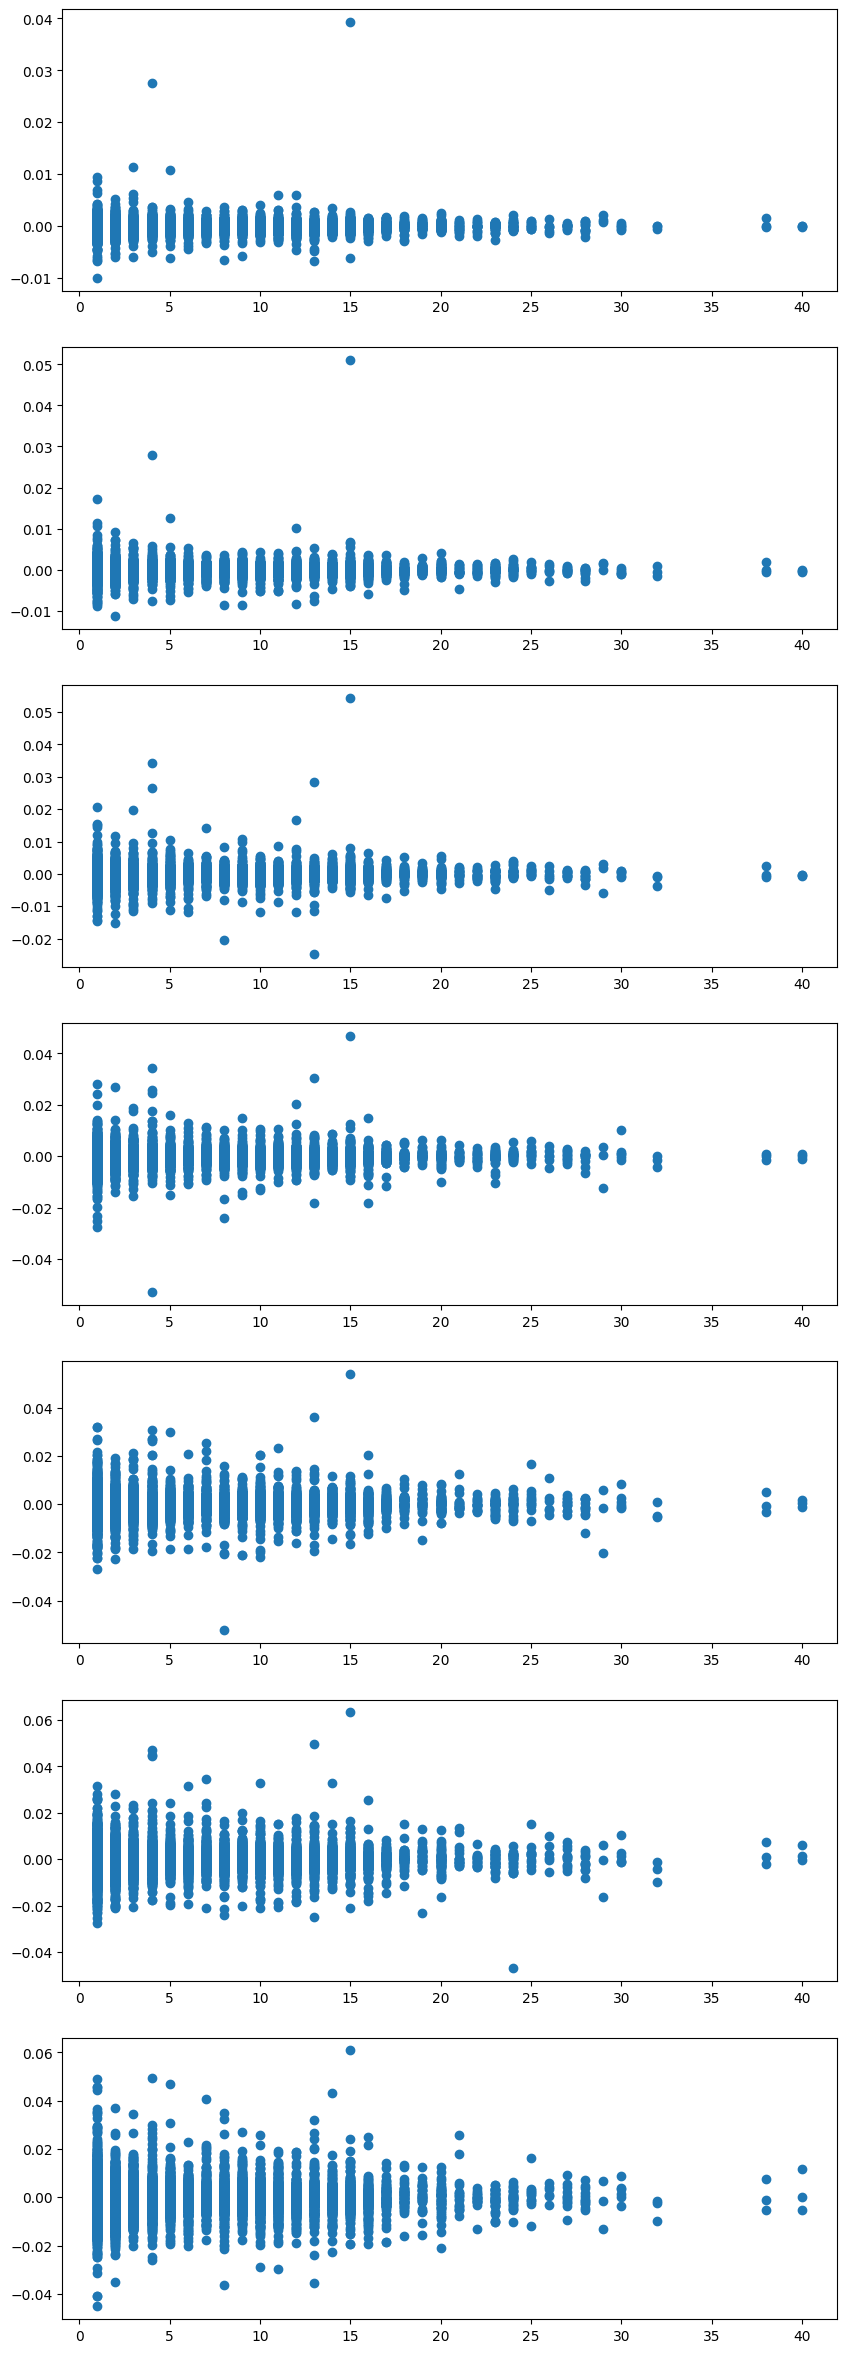

In [210]:
windows = [1, 2, 5, 10, 20, 30, 50]

plt.figure(figsize=(10, 30))

for w in windows:
    plt.subplot(len(windows), 1, windows.index(w) + 1)
    plt.scatter(ink['last_trade_volume_sum'], ink[f'fut_return_{w}'])
    # plt.title(f'ink_return_{w}')
    # plt.xlabel('last_trade_volume_sum')
    # plt.ylabel(f'ink_return_{w}')

plt.show()

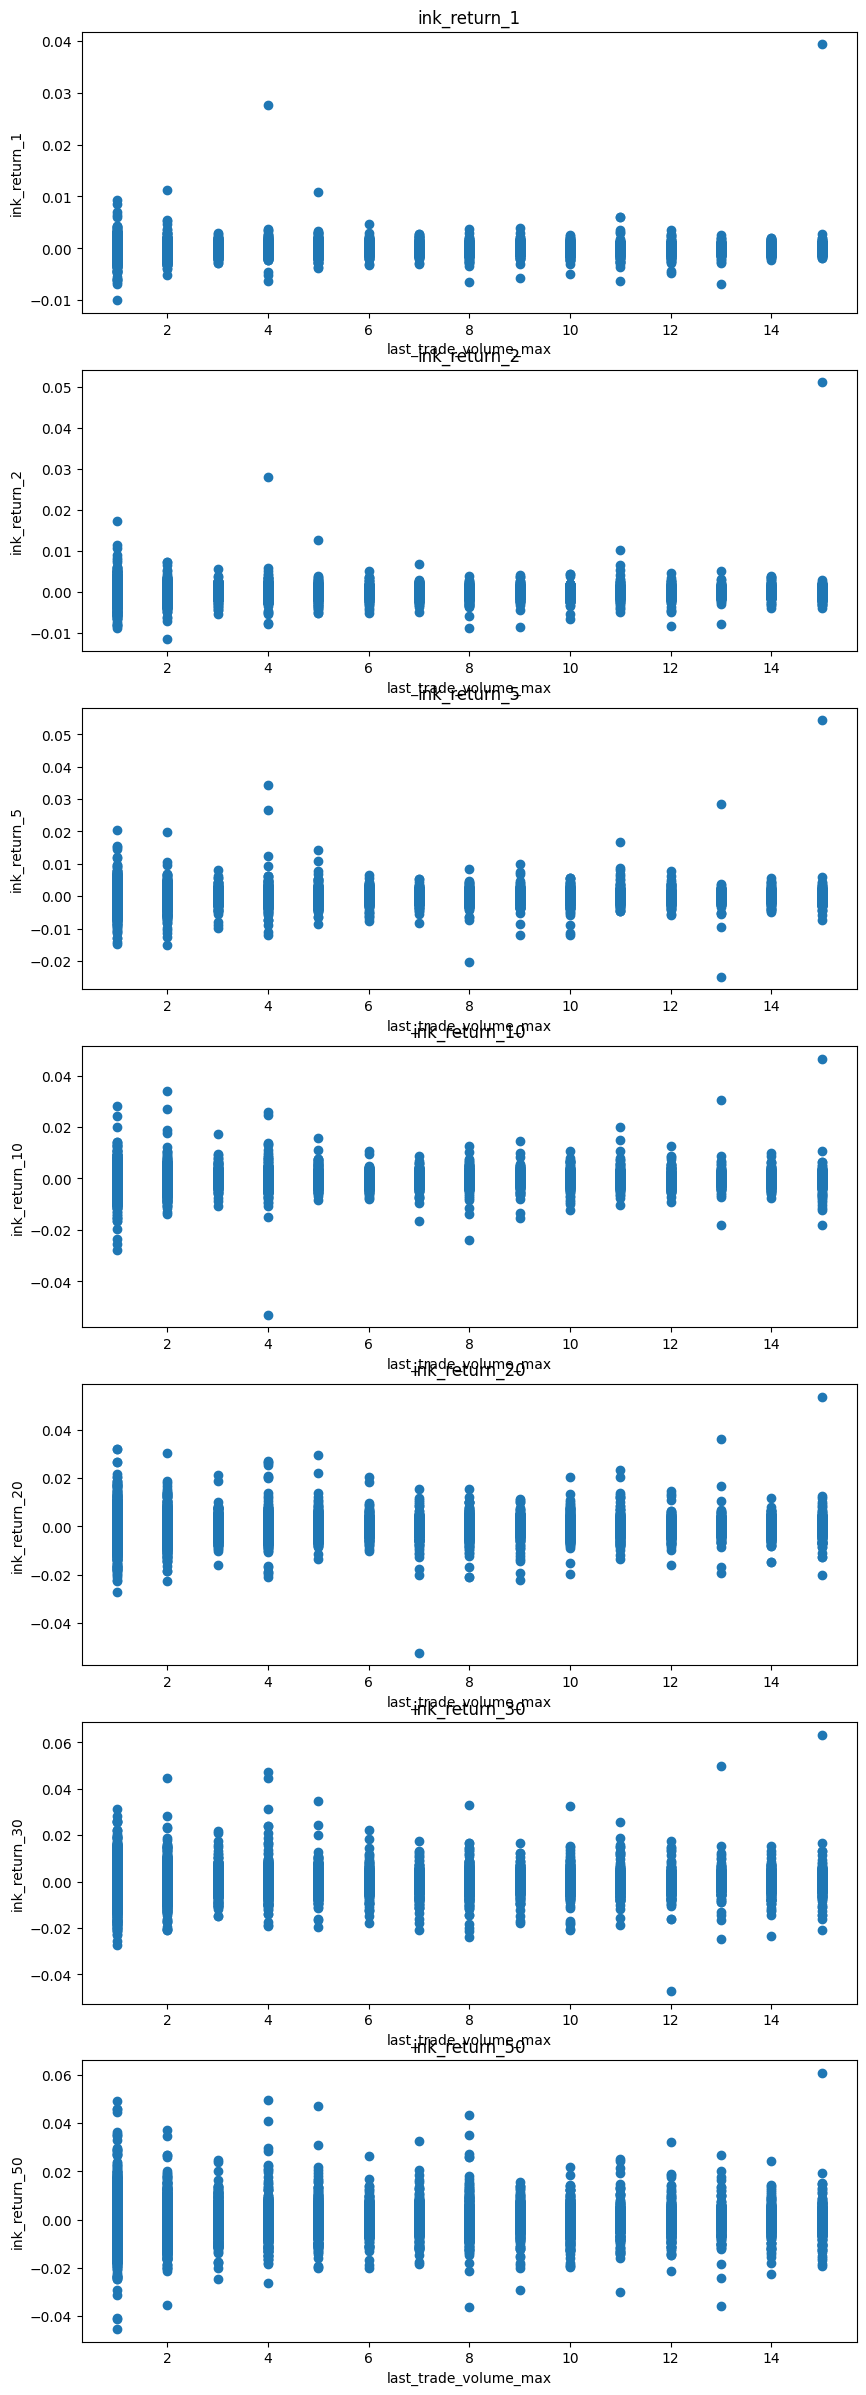

In [211]:
windows = [1, 2, 5, 10, 20, 30, 50]

plt.figure(figsize=(10, 30))

for w in windows:
    plt.subplot(len(windows), 1, windows.index(w) + 1)
    plt.scatter(ink['last_trade_volume_max'], ink[f'fut_return_{w}'])
    plt.title(f'ink_return_{w}')
    plt.xlabel('last_trade_volume_max')
    plt.ylabel(f'ink_return_{w}')

plt.show()

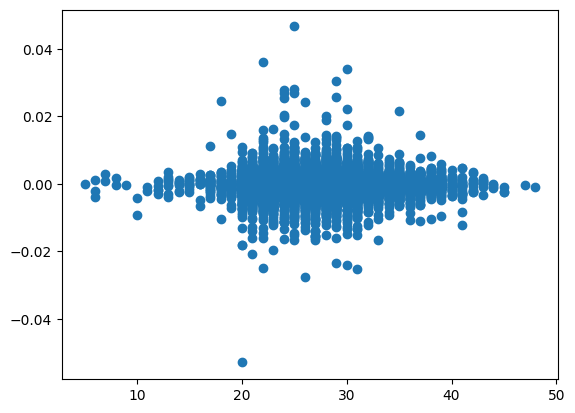

In [ ]:
plt.scatter(ink['tot_bid_volume'], ink[['fut_return_10']])

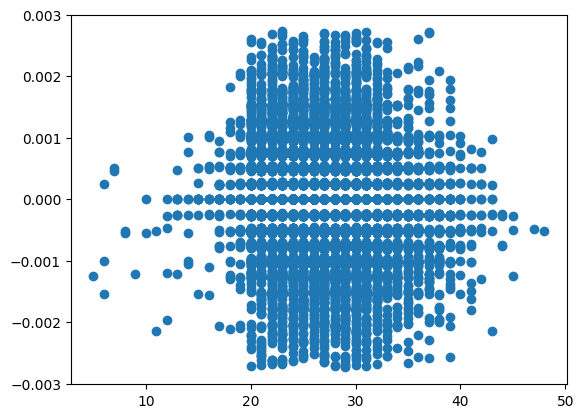

In [259]:
# plt.scatter(ink['tot_bid_volume'], ink[['fut_return_1']])

# create same plot with fut return outliers removed where fut return is more than 3 std from the mean

ink['fut_1_z'] = (ink['fut_return_1'] - ink['fut_return_1'].mean()) / ink['fut_return_1'].std()

plt.scatter(ink[ink['fut_1_z'].abs() < 3]['tot_bid_volume'], ink[ink['fut_1_z'].abs() < 3]['fut_return_1'])

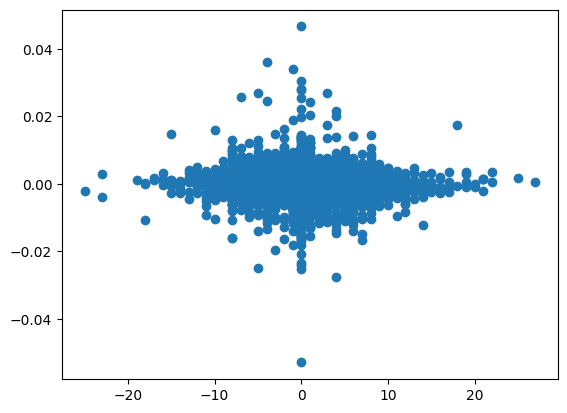

In [221]:
plt.scatter(ink['vol_diff'], ink[['fut_return_10']])

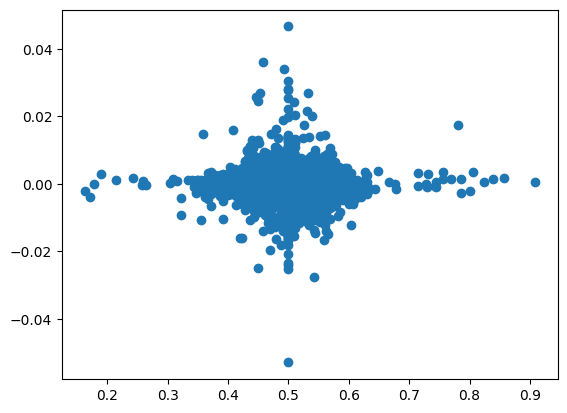

In [227]:
plt.scatter(ink['tot_bid_volume'] / (ink['tot_bid_volume'] + ink['tot_ask_volume']), ink['fut_return_10'])

In [243]:
ink.columns

Index(['day', 'timestamp', 'product', 'bid_price_1', 'bid_volume_1',
       'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3',
       'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2',
       'ask_price_3', 'ask_volume_3', 'mid_price', 'profit_and_loss',
       'tot_bid_volume', 'tot_ask_volume', 'tot_volume', 'vol_diff',
       'fut_return_1', 'fut_return_2', 'fut_return_5', 'fut_return_10',
       'fut_return_20', 'fut_return_30', 'fut_return_50',
       'last_trade_volume_sum', 'last_trade_volume_max'],
      dtype='object')

In [247]:
ink[(ink['tot_bid_volume'] <= 10) | (ink['tot_ask_volume'] <= 10)][['tot_bid_volume', 'tot_ask_volume', 'fut_return_1']]

,tot_bid_volume,tot_ask_volume,fut_return_1
323,6.0,22.0,0.000251
580,5.0,23.0,-0.001253
992,6.0,31.0,-0.001000
1166,22.0,6.0,0.001500
1524,30.0,9.0,0.001519
7300,7.0,20.0,0.000468
8386,22.0,6.0,0.000475
8963,29.0,7.0,0.000244
8967,9.0,25.0,-0.001218
10332,10.0,21.0,0.000000


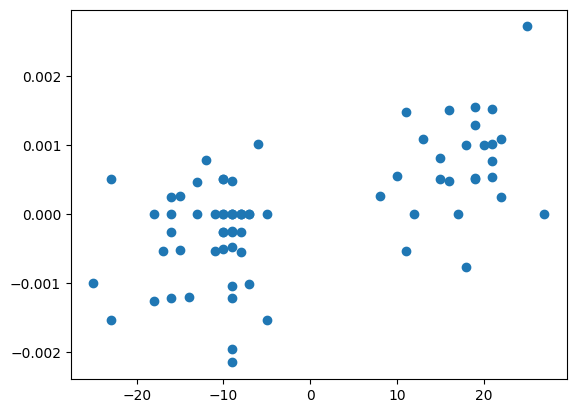

In [261]:
thresh = 15

q = (ink['tot_bid_volume'] <= thresh) | (ink['tot_ask_volume'] <= thresh)

plt.scatter(ink[q]['vol_diff'], ink[q]['fut_return_1'])

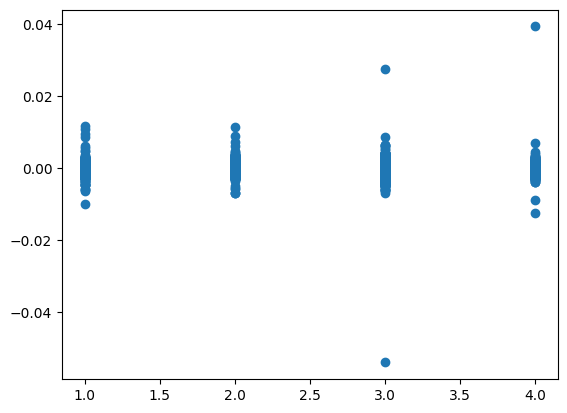

In [263]:
spread = ink['ask_price_1'] - ink['bid_price_1']
plt.scatter(spread, ink['fut_return_1'])

In [269]:
spread.sum()

np.int64(79972)